In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import hinge_loss
from sklearn import metrics
import datetime
from datetime import date
from sklearn.metrics import f1_score

In [2]:
result_linear = pd.read_csv('./credictCard_fraud/result_linear')

In [3]:
result_rbf = pd.read_csv('./credictCard_fraud/result_rbf')

In [4]:
result_poly = pd.read_csv('./credictCard_fraud/result_poly')

In [5]:
result_linear

,size,accuracy,time_train,f1_score,precison,recall
0,80,0.99650,0.001289,0.927835,0.989011,0.873786
1,160,0.98850,0.001509,0.798246,0.728000,0.883495
2,240,0.99150,0.001900,0.842593,0.805310,0.883495
3,320,0.99100,0.002230,0.834862,0.791304,0.883495
4,400,0.99075,0.002662,0.829493,0.789474,0.873786
5,480,0.99100,0.003289,0.833333,0.796460,0.873786
6,560,0.99575,0.005563,0.911917,0.977778,0.854369
7,640,0.99600,0.006617,0.916667,0.988764,0.854369
8,720,0.99600,0.007201,0.916667,0.988764,0.854369
9,800,0.99600,0.008353,0.916667,0.988764,0.854369


In [6]:
result = result_linear

In [7]:
result_rbf

,size,accuracy,time_train,f1_score,precison,recall
0,80,0.99025,0.001632,0.769231,0.984848,0.631068
1,160,0.98975,0.001848,0.754491,0.984375,0.611650
2,240,0.99075,0.002507,0.783626,0.985294,0.650485
3,320,0.99475,0.003132,0.887701,0.988095,0.805825
4,400,0.99475,0.003904,0.887701,0.988095,0.805825
5,480,0.99450,0.005070,0.881720,0.987952,0.796117
6,560,0.99500,0.005921,0.893617,0.988235,0.815534
7,640,0.99500,0.006014,0.893617,0.988235,0.815534
8,720,0.99425,0.007089,0.875676,0.987805,0.786408
9,800,0.99500,0.007836,0.893617,0.988235,0.815534


In [8]:
result['accuracy poly'] = result_poly[['accuracy']]
result['accuracy rbf'] = result_rbf[['accuracy']]
result['f1_score poly']= result_poly[['f1_score']]
result['f1_score rbf'] = result_rbf[['f1_score']]
result['precision poly']= result_poly[['precison']]
result['precision rbf']= result_rbf[['precison']]
result['recall poly']= result_poly[['recall']]
result['recall rbf'] = result_rbf[['recall']]
result['time train poly']= result_poly[['time_train']]
result['time train rbf']= result_rbf[['time_train']]

In [9]:
result.rename(columns={'accuracy':'accuracy linear','f1_score': 'f1_score linear','precison': 'precision linear','recall':'recall linear','time_train':'time train linear'}, inplace=True)

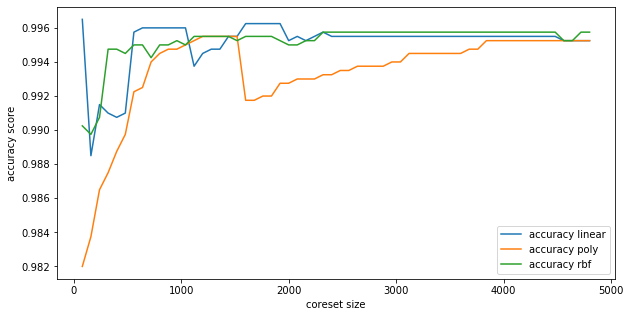

In [10]:
ax= result.plot(kind='line', x='size', y=['accuracy linear','accuracy poly','accuracy rbf'],figsize=(10,5))
ax.set(xlabel='coreset size', ylabel='accuracy score')
plt.show()

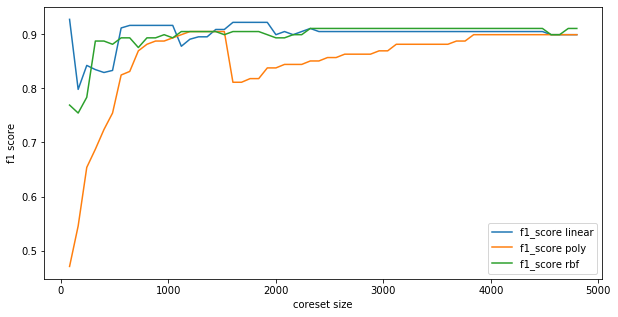

In [11]:
ax = result.plot(kind='line', x='size', y=['f1_score linear','f1_score poly','f1_score rbf'],figsize=(10,5))
ax.set(xlabel='coreset size', ylabel='f1 score')
plt.show()

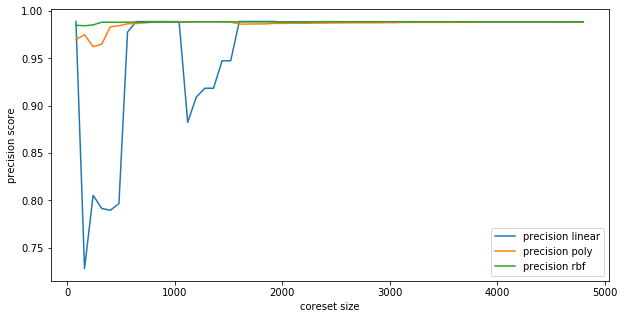

In [12]:
ax= result.plot(kind='line', x='size', y=['precision linear','precision poly','precision rbf'],figsize=(10,5))
ax.set(xlabel='coreset size', ylabel='precision score')
plt.show()

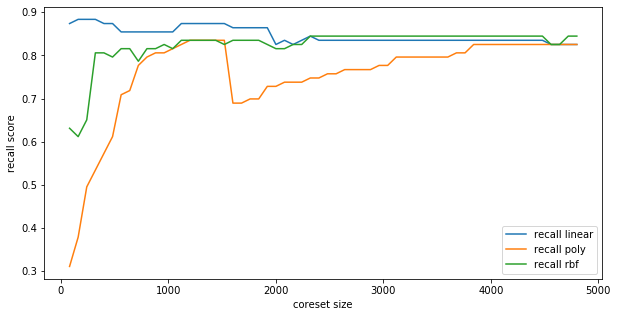

In [13]:
ax= result.plot(kind='line', x='size', y=['recall linear','recall poly','recall rbf'],figsize=(10,5))
ax.set(xlabel='coreset size', ylabel='recall score')
plt.show()

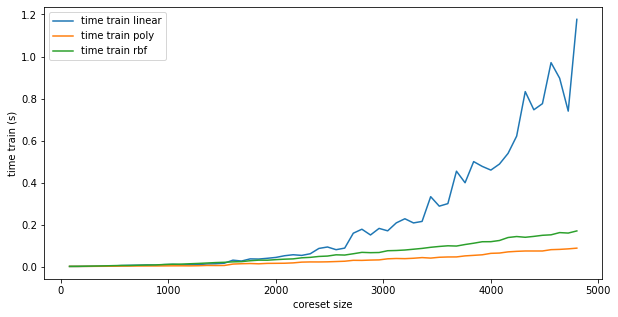

In [14]:
ax= result.plot(kind='line', x='size', y=['time train linear','time train poly','time train rbf'],figsize=(10,5))
ax.set(xlabel='coreset size', ylabel='time train (s)')
plt.show()